Setup

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns

In [2]:
!pip install -U scikit-multiflow
#resource for profanity: https://pypi.org/project/profanity-check/
!pip install alt-profanity-check
!pip install sklearn --upgrade
#resource for sentiment: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
!pip install nltk
from profanity_check import predict
import nltk
nltk.download([
"names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254677 sha256=b6cbe8c151d69726970a6a5357a4b9589194d4148f7b457c5f59643af9924cd2
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 100.8 MB/s eta 0:00:00
  Created wheel for alt-profanity-check: filename=alt_profanity_check-1.3.1-py3-none-any.whl size=1866682 sha256=dcb0d8da1d1d5cfc7a74d2da72f8c3096c0d5175eb5da151a6d05fcb68e32a03
  Stored in directory: /root/.cache/pip/wheels/fd/c7/5e/5579c7145bae270d6a7896320ab0575a897cc7d71e84772e26
Successfully built alt-profanity-check
  Attempting uninstall: 

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
%matplotlib notebook

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Fixing and Modifying

In [95]:
#had to edit first row of csv file so that file was read with 3 columns and not 1
tweets = pd.read_csv("/content/drive/MyDrive/Master's Project/hatespeech_text_label_vote_RESTRICTED_100K_v2.csv")
tweets

,Tweet text Label Votes for the majority label,Unnamed: 1,Unnamed: 2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


In [96]:
#had to fix dataframe column names
tweets = tweets.rename(columns={"Tweet text  Label   Votes for the majority label": "Tweet text", "Unnamed: 1": "Label", "Unnamed: 2": "Votes for the majority label"})

In [97]:
#last column not needed
tweets.drop(tweets.columns[[2]], axis=1, inplace=True)
tweets

,Tweet text,Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


Abusive/Hateful Tweets

In [98]:
#"spam" labels not needed
tweets = tweets[tweets['Label'] != "spam"]
tweets

,Tweet text,Label
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [99]:
#check to make sure spam labels dropped
pd.unique(tweets['Label'])

array(['abusive', 'normal', 'hateful'], dtype=object)

Tweet Feature Extraction And Data Cleaning/Processing

In [100]:
tweets["@ count"] = tweets['Tweet text'].str.count('@')
#Remove @'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')

tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
#Remove #'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('#[\S]*','')

tweets['Retweet'] = tweets['Tweet text'].str.contains('RT')
#Remove RT's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('RT', '')

tweets['Url count'] = tweets['Tweet text'].str.count('http[\S]*')
#Remove URL's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('http[\S]*','')

tweets['Uppercase word count'] = tweets['Tweet text'].apply(lambda x: sum(map(str.isupper, x.split())))

#Remove punctuation from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[7]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[7]], axis=1, inplace=True)

<ipython-input-100-f6f0826d7527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["@ count"] = tweets['Tweet text'].str.count('@')
<ipython-input-100-f6f0826d7527>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-100-f6f0826d7527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-100-f

In [101]:
tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
tweets['Profanity count'] = tweets['Profanity count'].apply(lambda x: sum(predict(x)))

sia = SentimentIntensityAnalyzer() #Sentiment is 'compound' value from -1 to 1
tweets['Sentiment'] = tweets['Tweet text'].apply(lambda x: sia.polarity_scores(x)['compound'])

#Remove numbers from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
#Remove non-letters from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')

<ipython-input-101-c5c47215392b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
<ipython-input-101-c5c47215392b>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
<ipython-input-101-c5c47215392b>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
<ipython-input-101-c5c47215392b>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')


In [102]:
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Profanity count,Sentiment
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,0.1280
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,0,0.0000
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,0,0.0000
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,0,-0.0516
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,3,-0.8689
...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,0.0000
99992,treated with rebuild bone mass,normal,0,3,False,2,0,0,0.0000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,-0.9430
99994,vs but equally applies to any project,normal,0,3,False,2,0,0,0.0000


A/H Basic Tweet Analysis

In [103]:
tweets['Label'].value_counts()

normal     53655
abusive    27141
hateful     4963
Name: Label, dtype: int64

In [104]:
tweets['@ count'].value_counts()

0     42355
1     31725
2      6698
3      2572
4      1131
5       561
6       269
7       235
8       129
9        57
10       20
11        5
12        2
Name: @ count, dtype: int64

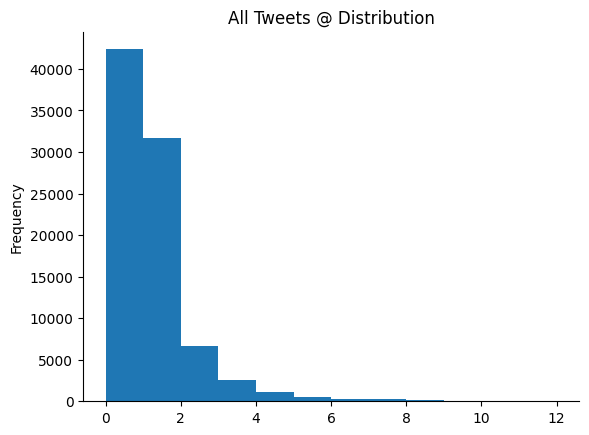

In [105]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
tweets['@ count'].plot(kind='hist', bins=12, title='All Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

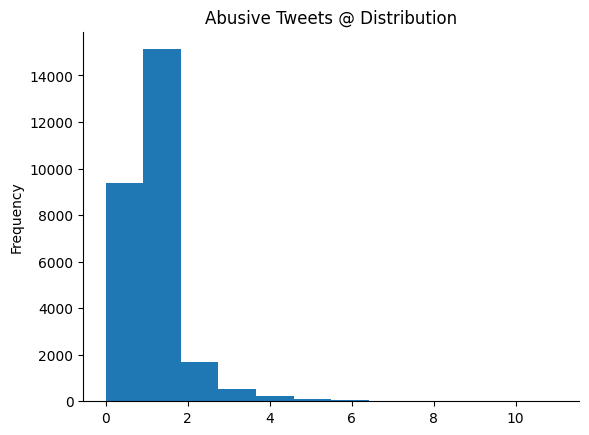

In [106]:
tweets[tweets['Label'] == "abusive"]['@ count'].plot(kind='hist', bins=12, title='Abusive Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

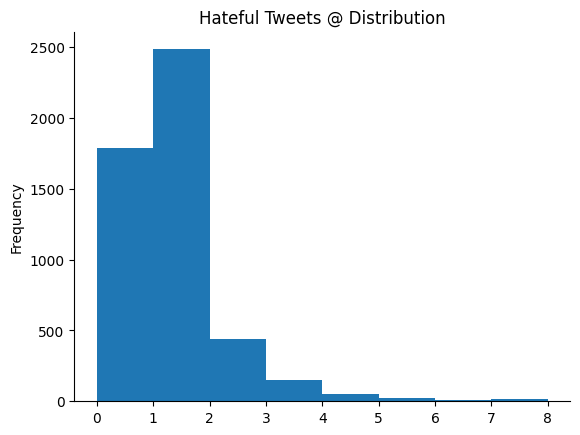

In [107]:
tweets[tweets['Label'] == "hateful"]['@ count'].plot(kind='hist', bins=8, title='Hateful Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

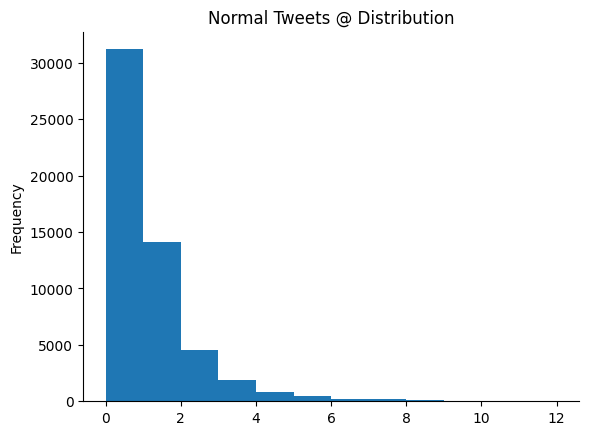

In [108]:
tweets[tweets['Label'] == "normal"]['@ count'].plot(kind='hist', bins=12, title='Normal Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

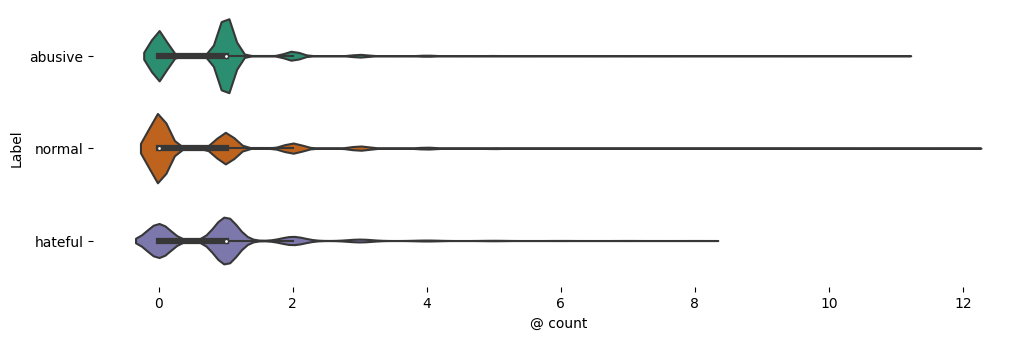

In [109]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='@ count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [110]:
tweets['Hashtag count'].value_counts()

0      60615
1      12436
2       6072
3       3217
4       1948
5        555
6        289
7        181
8        139
9         65
11        43
10        39
12        29
13        19
27        18
14        13
15        12
24        10
16        10
17         7
18         7
21         4
22         4
19         3
30         3
34         2
33         2
25         2
20         2
35         1
23         1
29         1
54         1
60         1
103        1
59         1
64         1
97         1
28         1
78         1
36         1
31         1
Name: Hashtag count, dtype: int64

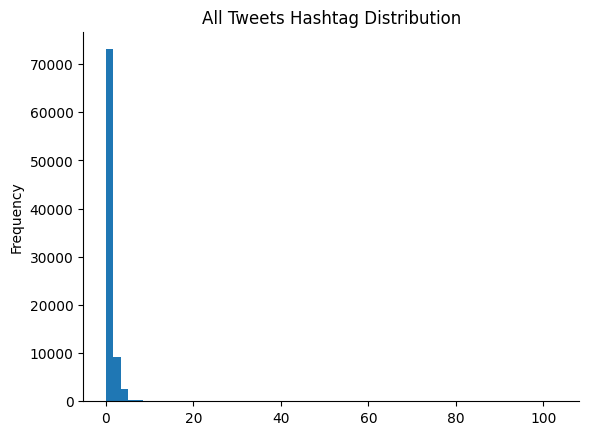

In [111]:
tweets['Hashtag count'].plot(kind='hist', bins=60, title='All Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

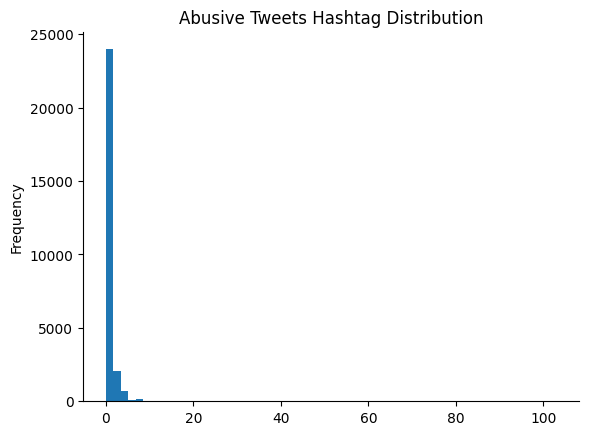

In [112]:
tweets[tweets['Label'] == "abusive"]['Hashtag count'].plot(kind='hist', bins=60, title='Abusive Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

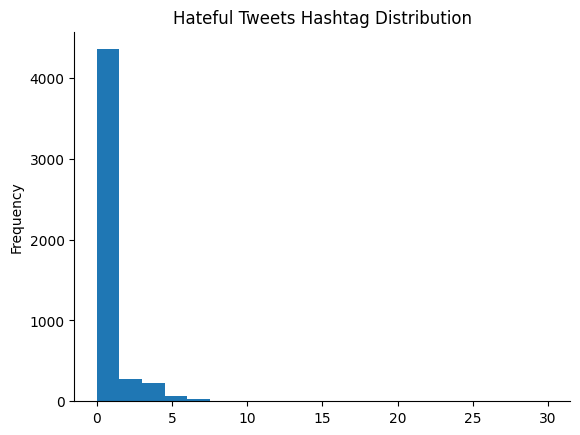

In [113]:
tweets[tweets['Label'] == "hateful"]['Hashtag count'].plot(kind='hist', bins=20, title='Hateful Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

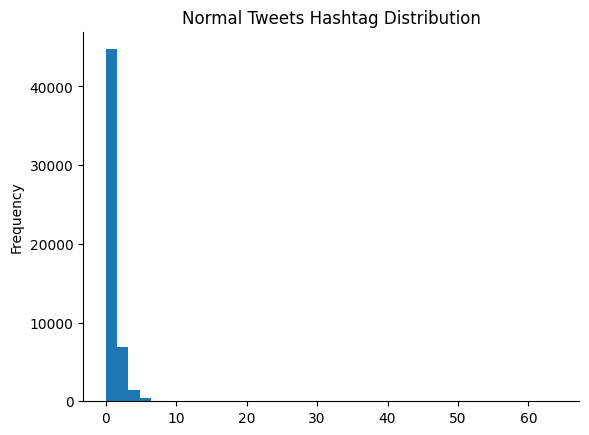

In [114]:
tweets[tweets['Label'] == "normal"]['Hashtag count'].plot(kind='hist', bins=40, title='Normal Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

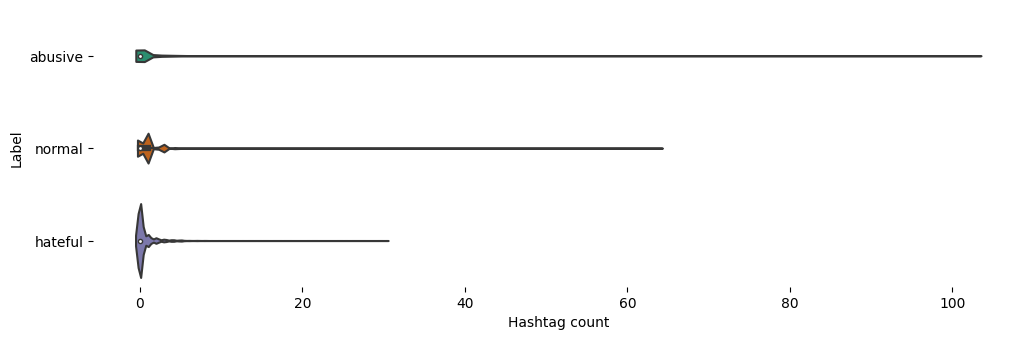

In [115]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Hashtag count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [116]:
tweets['Retweet'].value_counts()

False    68644
True     17115
Name: Retweet, dtype: int64

In [117]:
#Normal Tweets Retweet Distribution
tweets[tweets['Label'] == "normal"]['Retweet'].value_counts()

False    51921
True      1734
Name: Retweet, dtype: int64

In [118]:
#Abusive Tweets Retweet Distribution
tweets[tweets['Label'] == "abusive"]['Retweet'].value_counts()

True     13574
False    13567
Name: Retweet, dtype: int64

In [119]:
#Hateful Tweets Retweet Distribution
tweets[tweets['Label'] == "hateful"]['Retweet'].value_counts()

False    3156
True     1807
Name: Retweet, dtype: int64

In [120]:
tweets['Uppercase word count'].value_counts()

0     51803
1     19323
2      6687
3      2623
4      1242
5       796
6       480
7       454
8       300
9       286
10      236
12      230
11      191
13      172
14      111
17      107
15      105
19       93
22       92
16       90
18       82
20       56
21       52
23       43
24       35
25       27
26       17
28        8
29        7
27        6
30        3
31        2
Name: Uppercase word count, dtype: int64

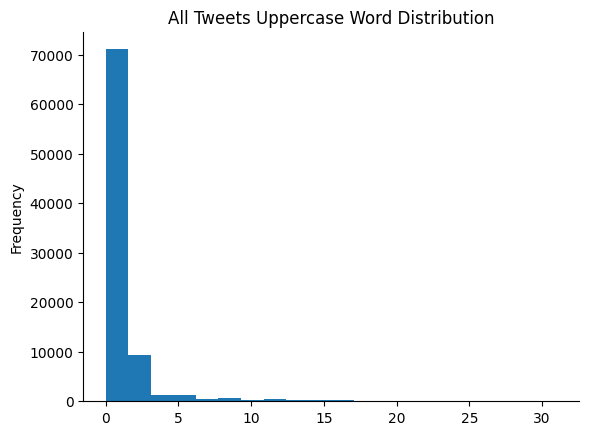

In [121]:
tweets['Uppercase word count'].plot(kind='hist', bins=20, title='All Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

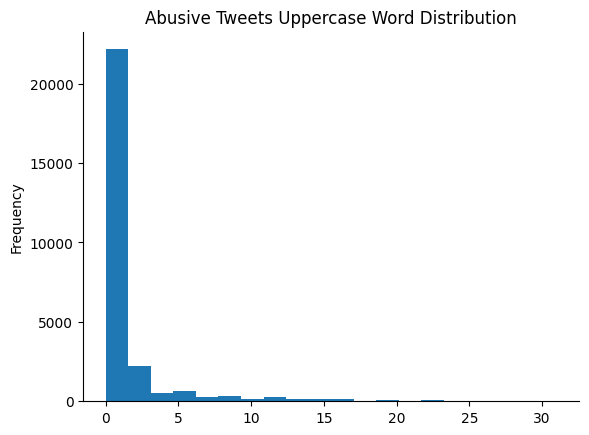

In [122]:
tweets[tweets['Label'] == "abusive"]['Uppercase word count'].plot(kind='hist', bins=20, title='Abusive Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

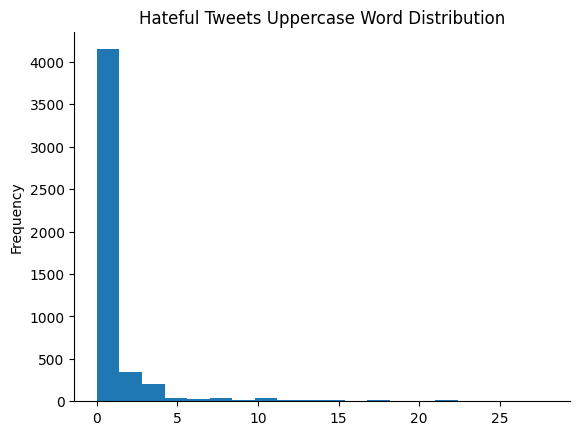

In [123]:
tweets[tweets['Label'] == "hateful"]['Uppercase word count'].plot(kind='hist', bins=20, title='Hateful Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

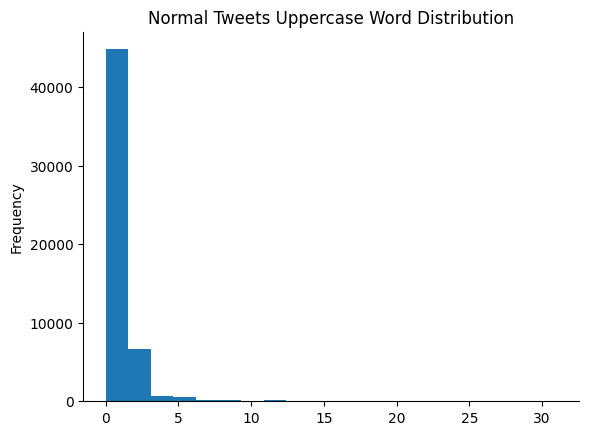

In [124]:
tweets[tweets['Label'] == "normal"]['Uppercase word count'].plot(kind='hist', bins=20, title='Normal Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

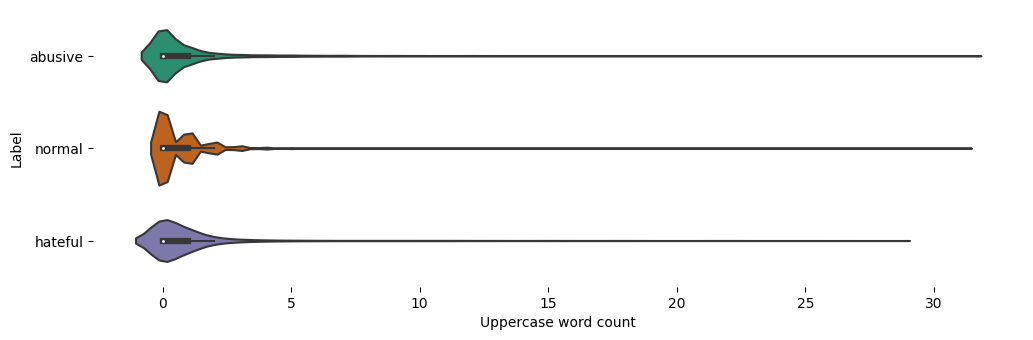

In [125]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Uppercase word count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [126]:
tweets['Profanity count'].value_counts()

0     47936
1     23331
2      9943
3      3298
4       881
5       256
6        58
7        23
9        12
8        11
10        5
11        3
16        1
13        1
Name: Profanity count, dtype: int64

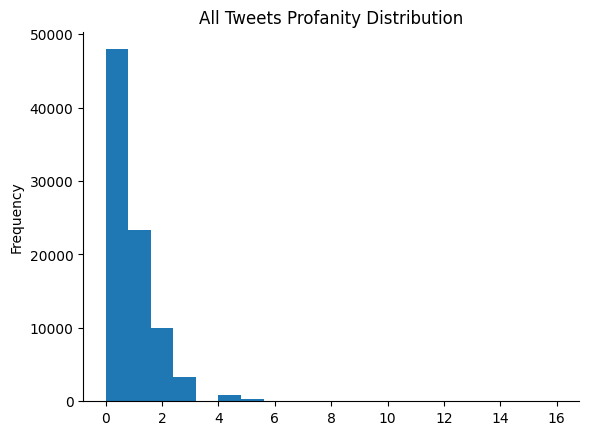

In [127]:
tweets['Profanity count'].plot(kind='hist', bins=20, title='All Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

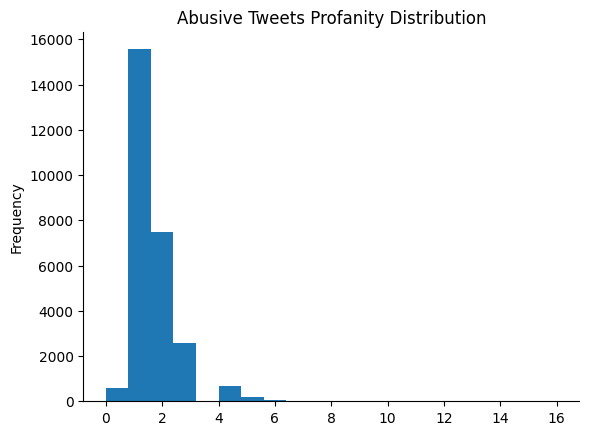

In [128]:
tweets[tweets['Label'] == "abusive"]['Profanity count'].plot(kind='hist', bins=20, title='Abusive Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

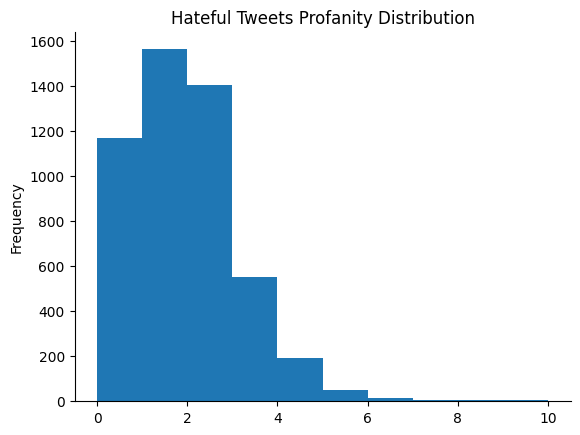

In [129]:
tweets[tweets['Label'] == "hateful"]['Profanity count'].plot(kind='hist', bins=10, title='Hateful Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

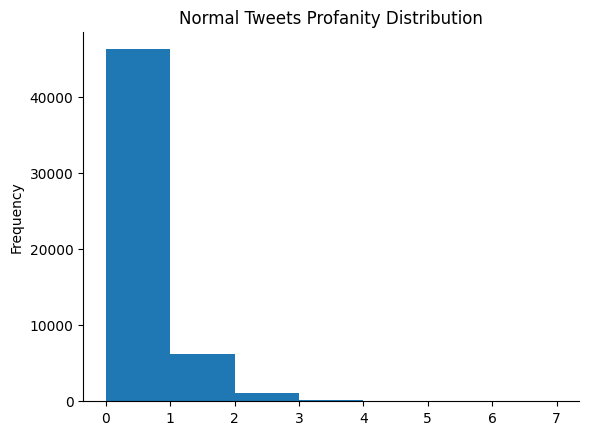

In [130]:
tweets[tweets['Label'] == "normal"]['Profanity count'].plot(kind='hist', bins=7, title='Normal Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

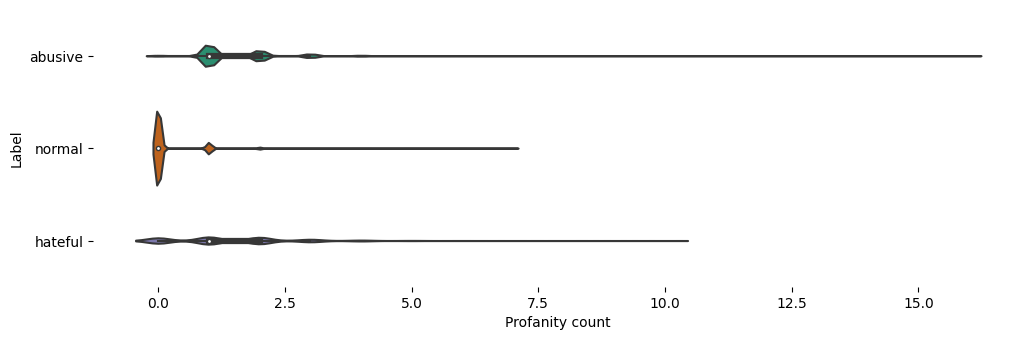

In [131]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Profanity count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

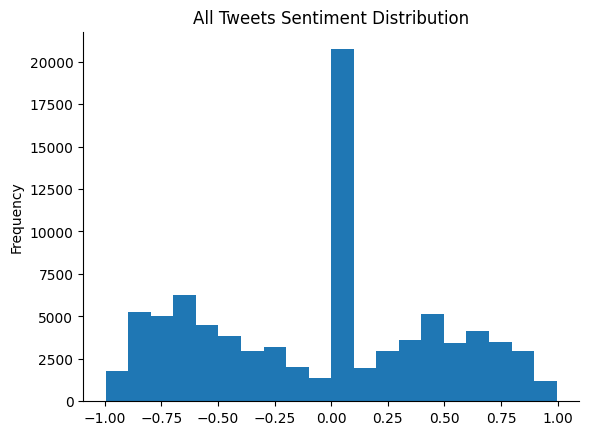

In [132]:
tweets['Sentiment'].plot(kind='hist', bins=20, title='All Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

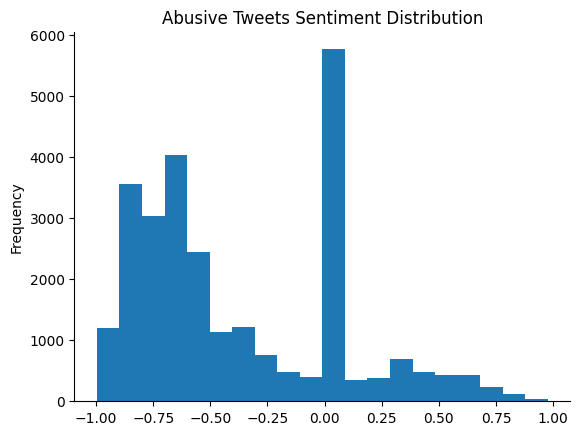

In [133]:
tweets[tweets['Label'] == "abusive"]['Sentiment'].plot(kind='hist', bins=20, title='Abusive Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

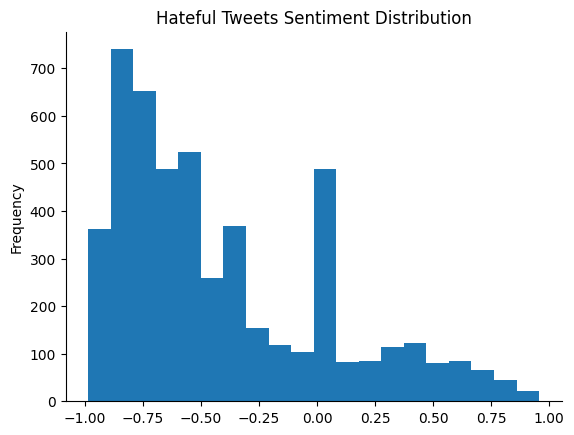

In [134]:
tweets[tweets['Label'] == "hateful"]['Sentiment'].plot(kind='hist', bins=20, title='Hateful Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

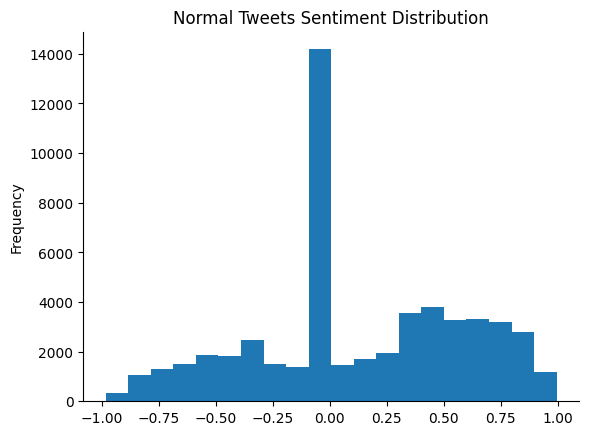

In [135]:
tweets[tweets['Label'] == "normal"]['Sentiment'].plot(kind='hist', bins=20, title='Normal Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

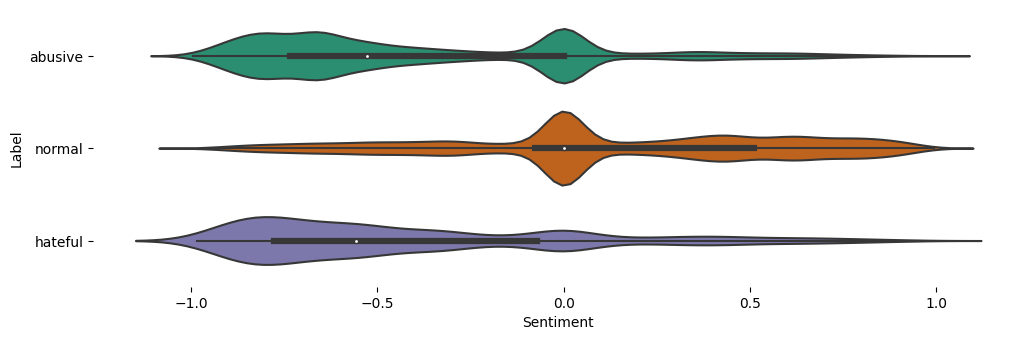

In [136]:
figsize = (12, 1.2 * len(tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tweets, x='Sentiment', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Aggressive Tweets

In [137]:
#combine abusive and hateful tweets into aggressive for later comparison with other work
aggressive_tweets = tweets
aggressive_tweets = aggressive_tweets.replace("abusive","aggressive")
aggressive_tweets = aggressive_tweets.replace("hateful","aggressive")
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Profanity count,Sentiment
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,0.1280
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,0,0.0000
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,0,0.0000
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,0,-0.0516
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,3,-0.8689
...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,0.0000
99992,treated with rebuild bone mass,normal,0,3,False,2,0,0,0.0000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,-0.9430
99994,vs but equally applies to any project,normal,0,3,False,2,0,0,0.0000


In [138]:
#check to make sure only aggressive and normal tweet labels exist
pd.unique(aggressive_tweets['Label'])

array(['aggressive', 'normal'], dtype=object)

Agg Tweet Analysis

In [139]:
aggressive_tweets['Label'].value_counts()

normal        53655
aggressive    32104
Name: Label, dtype: int64

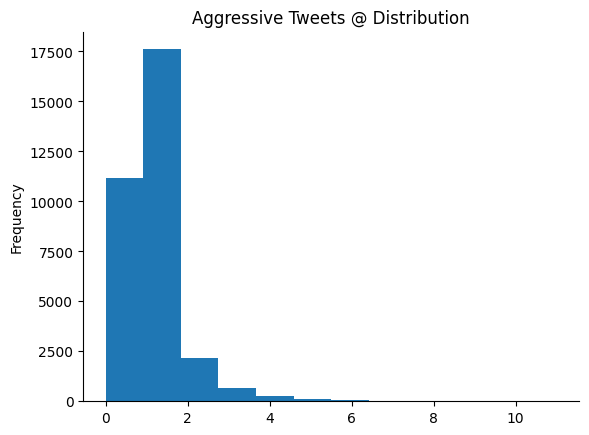

In [140]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['@ count'].plot(kind='hist', bins=12, title='Aggressive Tweets @ Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

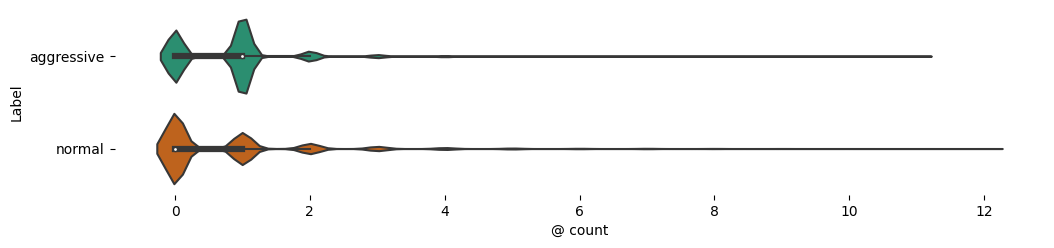

In [141]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='@ count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

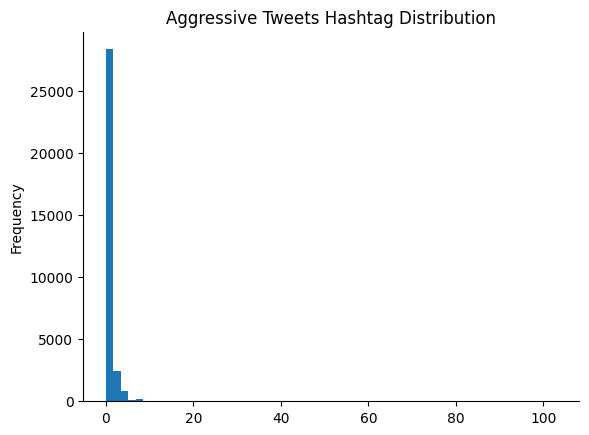

In [142]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Hashtag count'].plot(kind='hist', bins=60, title='Aggressive Tweets Hashtag Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

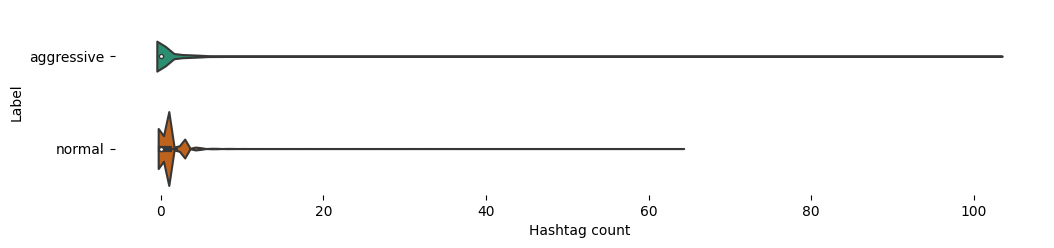

In [143]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Hashtag count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [144]:
#Aggressive Tweets Retweet Distribution
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Retweet'].value_counts()

False    16723
True     15381
Name: Retweet, dtype: int64

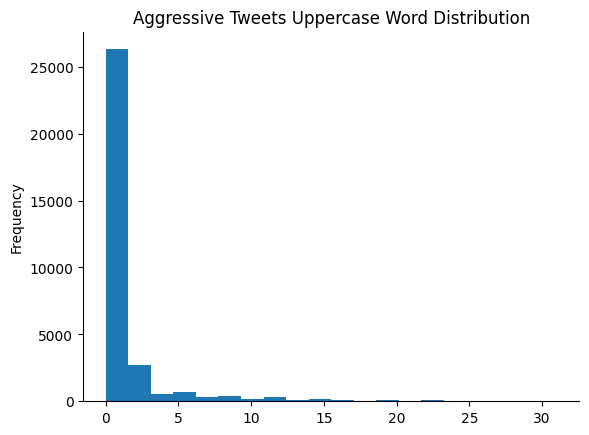

In [145]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Uppercase word count'].plot(kind='hist', bins=20, title='Aggressive Tweets Uppercase Word Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

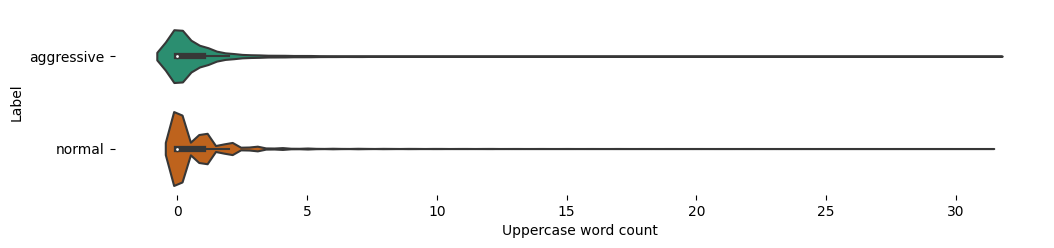

In [146]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Uppercase word count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

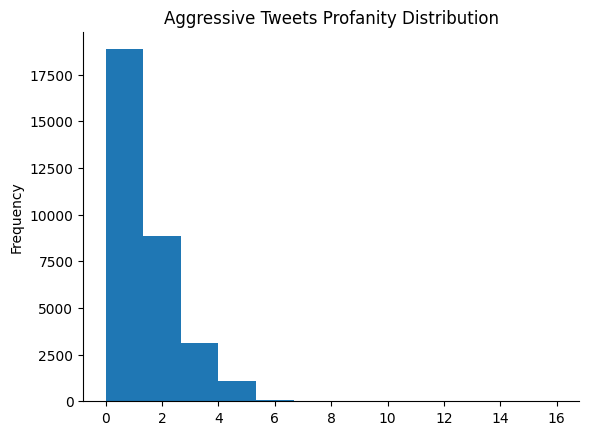

In [147]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Profanity count'].plot(kind='hist', bins=12, title='Aggressive Tweets Profanity Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

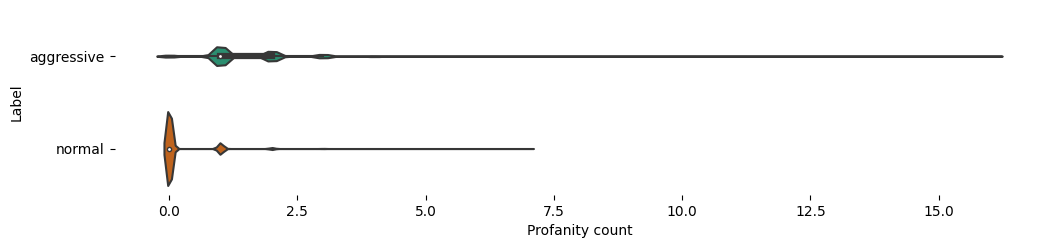

In [148]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Profanity count', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

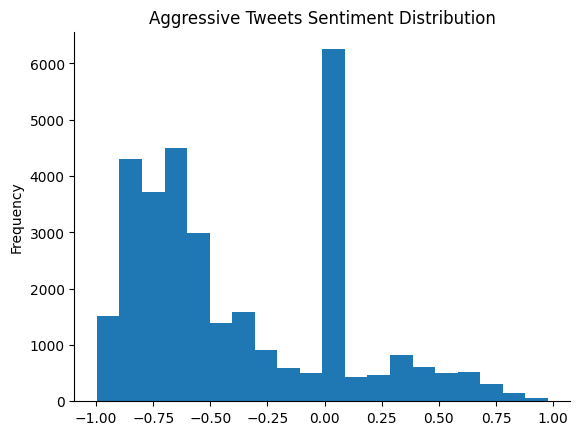

In [149]:
aggressive_tweets[aggressive_tweets['Label'] == "aggressive"]['Sentiment'].plot(kind='hist', bins=20, title='Aggressive Tweets Sentiment Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

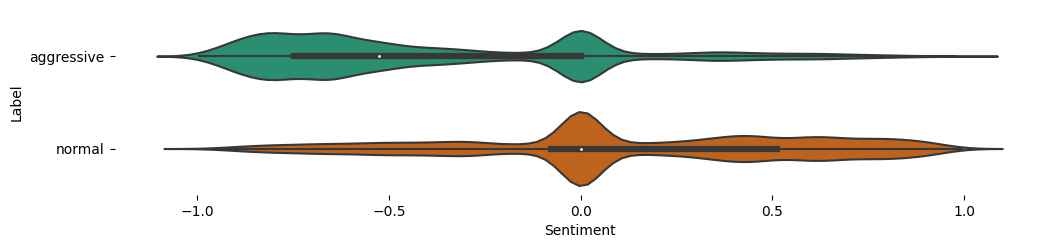

In [150]:
figsize = (12, 1.2 * len(aggressive_tweets['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(aggressive_tweets, x='Sentiment', y='Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)